In [1]:
import cell2cell as c2c

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
c2c.__version__

'0.5.10'

# Load Data

### Directories

In [3]:
import os

data_folder = './'
directory = os.fsencode(data_folder)

In [4]:
precomputed = c2c.io.read_data.load_variable_with_pickle(data_folder + '/PreBuiltTensor-PBMC.pkl')

### Tensor

For generating a prebuilt tensor, we just need a tensor (list of lists or any other array obtained from cell2cell or any other tool such as CellChat or CellPhoneDB). Here we will use a numpy array borrowed from a precomputed InteractionTensor.

***The tensor we use here is the one build in this [example of using Tensor-cell2cell](https://github.com/earmingol/cell2cell/blob/master/examples/tensor_cell2cell/GPU-Example.ipynb).***

The tensor in this case is a numpy array.

In [5]:
tensor = precomputed.tensor

In [6]:
type(tensor)

numpy.ndarray

In [7]:
tensor.shape

(60, 1639, 6, 6)

The tensor here contains the communication scores and looks like:

In [8]:
# First two coordinates of each dimension
tensor[:2, :2, :2, :2]

array([[[[0.06959707, 0.08663774],
         [0.1507252 , 0.16776587]],

        [[0.01465201, 0.03169268],
         [0.01140121, 0.02844188]]],


       [[[0.07142857, 0.09162473],
         [0.11220803, 0.13240418]],

        [[0.01190476, 0.03210092],
         [0.01058201, 0.03077816]]]])

**Names for each coordinate for each dimension**

Now we need a name for each coordinate in each dimension of the tensor. Again, we will borrow that from our precomputed InteractionTensor.

In [9]:
dim1_names = precomputed.order_names[0]

In [10]:
dim2_names = precomputed.order_names[1]

In [11]:
dim3_names = precomputed.order_names[2]

In [12]:
dim4_names = precomputed.order_names[3]

How they look like

In [13]:
# Names of the first five contexts
dim1_names[:5]

['S-HC003', 'S-HC004', 'S-HC005', 'S-HC006', 'S-HC007']

In [14]:
# Names of the first five ligand-receptor pairs
dim2_names[:5]

['TGFB1^TGFBR1&TGFBR2',
 'TGFB2^TGFBR1&TGFBR2',
 'TGFB3^TGFBR1&TGFBR2',
 'TGFB1^ACVR1B&TGFBR2',
 'TGFB1^ACVR1C&TGFBR2']

In [15]:
# Names of the first five sender cells
dim3_names[:5]

['B', 'CD4', 'CD8', 'DC', 'Mono']

In [16]:
# Names of the first five receiver cells
dim4_names[:5]

['B', 'CD4', 'CD8', 'DC', 'Mono']

# Generate a prebuilt Interaction Tensor

With this information we can now generate an InteractionTensor *without the need to use a gene expression matrix neither a list of LR pairs and we can directly reuse the communication scores* ***even from other tools.***

In [17]:
new = c2c.tensor.PreBuiltTensor(tensor=tensor,
                                order_names=[dim1_names, dim2_names, dim3_names, dim4_names],
                                order_labels=['Samples/Contexts', 'Ligand-Receptor Pairs', 'Sender Cells', 'Receiver Cells'],
                                mask=None, #Change if you want to omit values in the decomposition
                                device=None #Change if you are using pytorch as backend for using GPU
                               )

# Ready to perform analyses

**Decompose into 3 factors**

In [18]:
new.compute_tensor_factorization(rank=3,
                                 init='random',
                                 random_state=888)

**Plot the results**

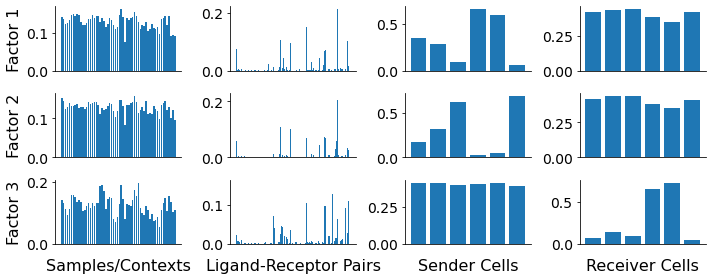

In [19]:
fig, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=new,
                                             fontsize=14,
                                            )

**For coloring the bars, we need a metadata object. Here we can reuse the one from our previous example [here](https://github.com/earmingol/cell2cell/blob/master/examples/tensor_cell2cell/GPU-Example.ipynb)**

In [20]:
meta_tf = c2c.io.read_data.load_variable_with_pickle(data_folder + '/PreBuiltMetadata-PBMC.pkl')

In [21]:
# Color palettes for each dimension in the tensor
cmaps = ['plasma', 'Dark2_r', 'tab20', 'tab20']

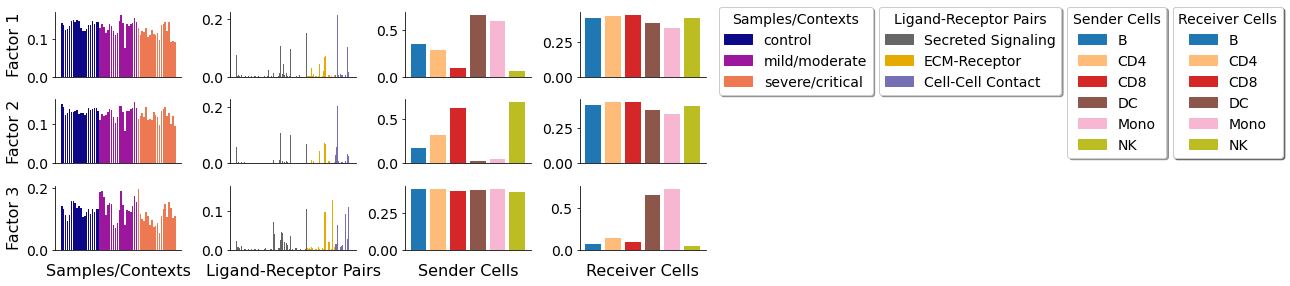

In [22]:
fig, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=new,
                                             metadata = meta_tf,
                                             sample_col='Element',
                                             group_col='Category',
                                             meta_cmaps=cmaps,
                                             fontsize=14,
                                            )

**Top-10 LR pairs in each factor:**

In [23]:
for i in range(new.rank):
    print(new.get_top_factor_elements('Ligand-Receptor Pairs', 'Factor {}'.format(i+1), 10))
    print('')

CLDN11^CLDN11         0.211589
CD99^CD99             0.185392
MIF^CD74&CXCR4        0.180537
MIF^CD74&CD44         0.170341
APP^CD74              0.167565
LGALS9^CD44           0.150860
TNFSF13B^TNFRSF13C    0.150534
ITGB2^ICAM2           0.143835
TNFSF13B^TNFRSF13B    0.140887
CD22^PTPRC            0.138933
Name: Factor 1, dtype: float64

CD99^CD99             0.218368
CLDN11^CLDN11         0.203478
MIF^CD74&CXCR4        0.184868
MIF^CD74&CD44         0.176572
ITGB2^ICAM2           0.158308
GZMA^F2R              0.144499
ITGB2^CD226           0.135290
TNFSF13B^TNFRSF13C    0.133917
CCL5^CCR4             0.133453
PTPRC^MRC1            0.132737
Name: Factor 2, dtype: float64

CD99^PILRA       0.157708
ANXA1^FPR1       0.144775
THBS1^CD36       0.143948
CSF3^CSF3R       0.142493
THBS3^CD36       0.130160
COMP^CD36        0.128425
THBS4^CD36       0.128259
THBS2^CD36       0.127596
IL16^CD4         0.121294
PECAM1^PECAM1    0.120986
Name: Factor 3, dtype: float64

